In [43]:
import numpy as np
import pandas as pd
from datetime import date
from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering, KMeans

In [2]:
customer = pd.read_csv('marketing_campaign.csv', sep='\t')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
customer["Recency"]

0       58
1       38
2       26
3       26
4       94
        ..
2235    46
2236    56
2237    91
2238     8
2239    40
Name: Recency, Length: 2240, dtype: int64

In [5]:
len(customer)

2240

In [6]:
customer.isnull()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
customer.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# find and show columns with null values
customer[customer.isna().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [9]:
# dropping null values
customer=customer.dropna()

In [10]:
customer.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
print("Lenght of dataset after null values are removed = ", len(customer))
# Notice intially length was 2240

Lenght of dataset after null values are removed =  2216


In [12]:
# checking the newest and oldest record in the dataset
#converting the object type to date time
customer["Dt_Customer"] = pd.to_datetime(customer["Dt_Customer"])
dates = customer["Dt_Customer"].dt.date
print(dates)
print(f"Newest customer={max(dates)}")
print(f"Oldest customer={min(dates)}")

0       2012-04-09
1       2014-08-03
2       2013-08-21
3       2014-10-02
4       2014-01-19
           ...    
2235    2013-06-13
2236    2014-10-06
2237    2014-01-25
2238    2014-01-24
2239    2012-10-15
Name: Dt_Customer, Length: 2216, dtype: object
Newest customer=2014-12-06
Oldest customer=2012-01-08


In [13]:
#calculating other customer's number of days relative to the oldest customer in the dataset
relative_date = max(dates) #newest customer
customer_days = [relative_date-date for date in dates]
customer["Customer_For_Days"] = customer_days
customer["Customer_For_Days"] = customer.Customer_For_Days.astype(str).map(lambda x: x[:-4])
customer["Customer_For_Days"] = pd.to_numeric(customer["Customer_For_Days"], errors="coerce")
customer["Customer_For_Days"]

0       971
1       125
2       472
3        65
4       321
       ... 
2235    541
2236     61
2237    315
2238    316
2239    782
Name: Customer_For_Days, Length: 2216, dtype: int64

In [14]:
#Explore the marital category count
print("Categories and count in Marital Status")
customer["Marital_Status"].value_counts()

Categories and count in Marital Status


Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [15]:
#Explore the education category count
print("Categories and count in education Status")
customer["Education"].value_counts()

Categories and count in education Status


Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [16]:
### Feature Engineering 

In [17]:
# Get Age of customers per current year
curr_year = date.today().year
print(f"Current Year = {curr_year}")
customer["Age"] = curr_year - customer["Year_Birth"]
# Get The total amount spent
customer["Spent_Amount"] = customer["MntWines"]+ customer["MntFruits"]+ customer["MntMeatProducts"]+ customer["MntFishProducts"]+ customer["MntSweetProducts"]+ customer["MntGoldProds"]

# Reducing the married/single status to partner/single status
# Married     857
# Together    573
# Single      471
# Divorced    232
# Widow        76
# Alone         3
# Absurd        2
# YOLO          2
# reducing all the single statuses (absurd, widow, divorced, alone, YOLO -> single)
customer["Partner"]=customer["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single", "Alone":"Single"})

# Number of total children
customer["Children"]=customer["Kidhome"]+customer["Teenhome"]

# Total household size
customer["Household_Size"] = customer["Partner"].replace({"Single": 1, "Partner":2})+ customer["Children"]

# is parent or not
customer["Is_Parent"] = np.where(customer.Children> 0, 1, 0)

Current Year = 2021


In [18]:
customer["Age"]

0       64
1       67
2       56
3       37
4       40
        ..
2235    54
2236    75
2237    40
2238    65
2239    67
Name: Age, Length: 2216, dtype: int64

In [19]:
customer[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [20]:
# Feature Engineering, new resultant columns
customer[["Customer_For_Days", "Age", "Spent_Amount", "Partner", "Children", "Household_Size", "Is_Parent"]].head()

,Customer_For_Days,Age,Spent_Amount,Partner,Children,Household_Size,Is_Parent
0,971,64,1617,Single,0,1,0
1,125,67,27,Single,2,3,1
2,472,56,776,Partner,0,2,0
3,65,37,53,Partner,1,3,1
4,321,40,422,Partner,1,3,1


In [21]:
#Rename some columns
# MntWines -> Wines_Amnt_spent
# MntFruits -> Fruits_Amnt_Spent
# MntMeatProducts -> Meat_Amnt_Spent
# MntFishProducts -> Fish_Amnt_Spent
# MntSweetProducts -> Sweets_Amnt_Spent
# MntGoldProds -> Gold_Amnt_Spent
customer=customer.rename(columns={"MntWines": "Wines_Amnt_Spent","MntFruits":"Fruits_Amnt_Spent","MntMeatProducts":"Meat_Amnt_Spent","MntFishProducts":"Fish_Amnt_Spent","MntSweetProducts":"Sweets_Amnt_Spent","MntGoldProds":"Gold_Amnt_Spent"})
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines_Amnt_Spent,...,Z_CostContact,Z_Revenue,Response,Customer_For_Days,Age,Spent_Amount,Partner,Children,Household_Size,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,3,11,1,971,64,1617,Single,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,3,11,0,125,67,27,Single,2,3,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,472,56,776,Partner,0,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,3,11,0,65,37,53,Partner,1,3,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,321,40,422,Partner,1,3,1


In [22]:
# Grouping Education Level
# current levels 
# customer["Education"].value_counts()
# Categories and count in education Status
# Graduation    1116
# PhD            481
# Master         365
# 2n Cycle       200
# Basic           54
# Reducing -----
# Basic - Undergraduate
# 2nd Cycle - Undergraduate
# Graduation - Graduate
# Master - Postgraduate
# PhD - Postgraduate
customer["Education"]=customer["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [23]:
# Dropping some redundant and unused features
# Marital status - since we already feature engineered it to "Partner"
drop_cols = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
customer = customer.drop(drop_cols, axis=1)

In [24]:
customer.describe()

,Income,Kidhome,Teenhome,Recency,Wines_Amnt_Spent,Fruits_Amnt_Spent,Meat_Amnt_Spent,Fish_Amnt_Spent,Sweets_Amnt_Spent,Gold_Amnt_Spent,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For_Days,Age,Spent_Amount,Children,Household_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,512.006318,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,232.469034,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,340.000000,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,513.000000,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,686.000000,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1063.000000,128.000000,2525.000000,3.000000,5.000000,1.000000


In [25]:
customer["Age"].describe()

count    2216.000000
mean       52.179603
std        11.985554
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

Relative Plot of selected features


<Figure size 576x396 with 0 Axes>

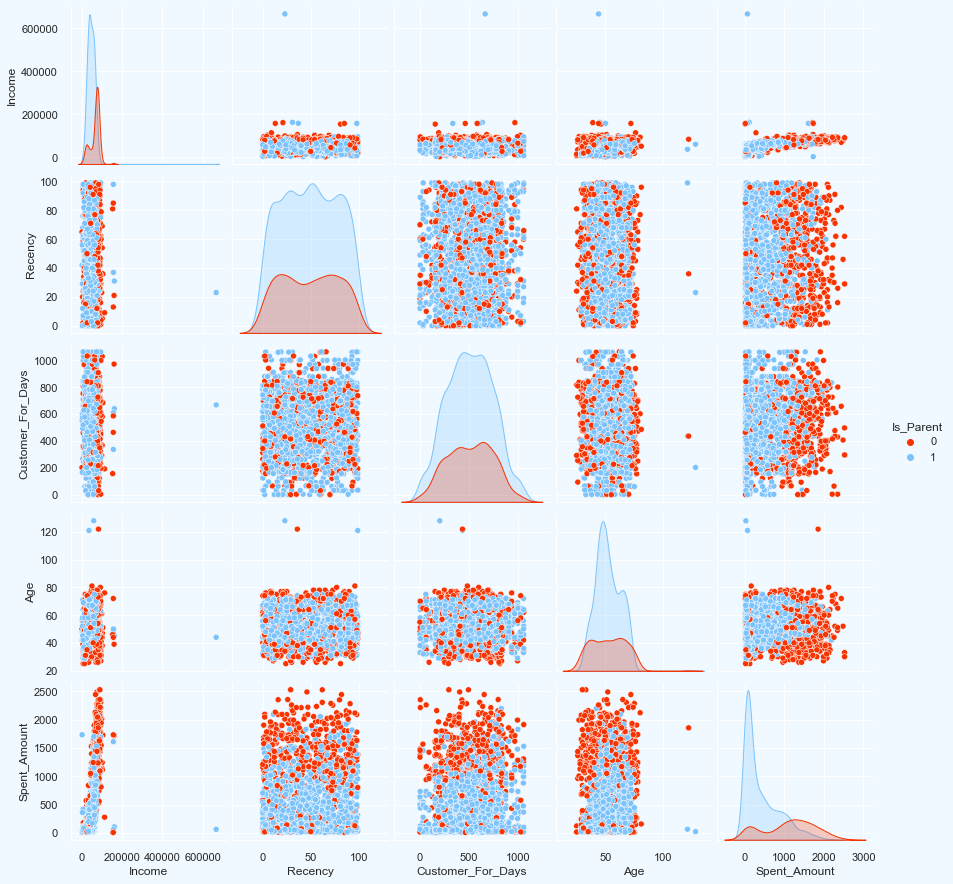

In [26]:
# observing the data
# max age = 128, to identify outliers?
# setting the colors
sns.set(rc={"axes.facecolor":"#f0f9ff","figure.facecolor":"#f0f9ff"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For_Days", "Age", "Spent_Amount", "Is_Parent"]
print("Relative Plot of selected features")
plt.figure()
sns.pairplot(customer[To_Plot], hue= "Is_Parent",palette= (["#f73302","#7cc3fc"]))
#Taking hue 
plt.show()

In [27]:
# income and age has certain outliers if referred from above, hence dropping them
print("length of customer data initially = ", len(customer))
customer = customer[(customer["Age"]<90)]
customer = customer[(customer["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(customer))

length of customer data initially =  2216
The total number of data-points after removing the outliers are: 2212


<AxesSubplot:>

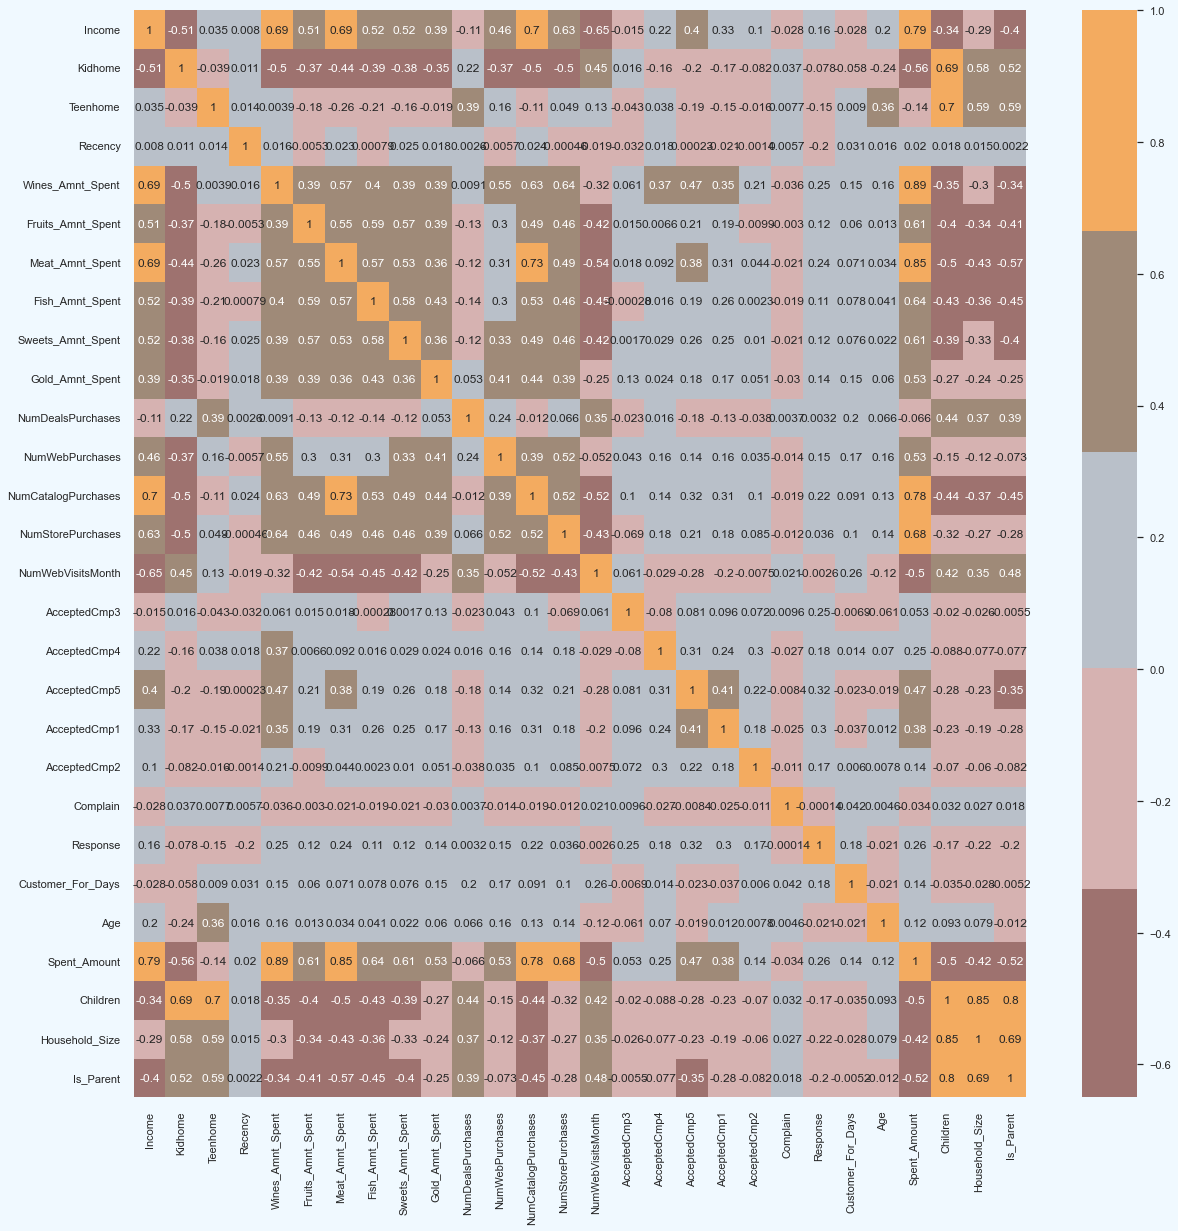

In [28]:
# correlation among the features
# find correlation matrix
corr_matrix= customer.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corr_matrix,annot=True, cmap=cmap, center=0)

# we see the data is quite clean

In [29]:
### Data Preprocessing

# - there are a bunch of categorical data which needs to be labeled.
# - scaling the features
# - Creating a subset of the original data for dimensionality reduction

In [30]:
# get categorical value columns
columns_type_object = (customer.dtypes == 'object')
columns_type_object = list(columns_type_object[columns_type_object].index)
print("Columns having categorical data=", columns_type_object)

Columns having categorical data= ['Education', 'Partner']


In [31]:
# label encoding the object dtypes
label_encoder = LabelEncoder()
for i in columns_type_object:
    customer[i] = customer[[i]].apply(label_encoder.fit_transform)
customer.head()
# notice how education and partner has 0 and 1 as data now

,Education,Income,Kidhome,Teenhome,Recency,Wines_Amnt_Spent,Fruits_Amnt_Spent,Meat_Amnt_Spent,Fish_Amnt_Spent,Sweets_Amnt_Spent,...,AcceptedCmp2,Complain,Response,Customer_For_Days,Age,Spent_Amount,Partner,Children,Household_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,971,64,1617,1,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,125,67,27,1,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,472,56,776,0,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,65,37,53,0,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,321,40,422,0,1,3,1


In [32]:
customer_v2 = customer.copy()
# Dropping certain features on accepted promotions/complain and response
columns_to_delete = ['Complain', 'Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']
customer_v2 = customer_v2.drop(columns_to_delete, axis=1)
customer_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines_Amnt_Spent     2212 non-null   int64  
 6   Fruits_Amnt_Spent    2212 non-null   int64  
 7   Meat_Amnt_Spent      2212 non-null   int64  
 8   Fish_Amnt_Spent      2212 non-null   int64  
 9   Sweets_Amnt_Spent    2212 non-null   int64  
 10  Gold_Amnt_Spent      2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [33]:
# scaling the columns
scaler = StandardScaler()
scaler.fit(customer_v2)
scaled_customer = pd.DataFrame(scaler.transform(customer_v2), columns= customer_v2.columns)
print("Scaled features to be used for modelling!")
scaled_customer.head()

Scaled features to be used for modelling!


,Education,Income,Kidhome,Teenhome,Recency,Wines_Amnt_Spent,Fruits_Amnt_Spent,Meat_Amnt_Spent,Fish_Amnt_Spent,Sweets_Amnt_Spent,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For_Days,Age,Spent_Amount,Partner,Children,Household_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,-0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,-0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,-0.740959,0.069987,0.449070,0.632456


In [34]:
## Dimensioality Reduction - Process of reducing the number of random vars which will be considered and passed through classifier. Eventually we will obtain a set of principal variables.
# PCA - Principal Component Analysis - techniqe of reducing the dimensionality of the datatsets but also increasing the onterpretability. It also ensures the information loss is minimal
# Dimensionality reduction with PCA


In [35]:
# Initializing dimention reduction with PAC and making the features to 3

pca = PCA(n_components=3)
pca.fit(scaled_customer)
pca_dataset = pd.DataFrame(pca.transform(scaled_customer), columns=(["col1","col2","col3"]))
pca_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.017872e-16,2.878377,-5.969395,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,1.365193e-17,1.706839,-4.312044,-1.328366,-0.158286,1.242317,6.142729
col3,2212.0,2.022694e-17,1.221957,-3.530319,-0.828663,-0.021917,0.799517,6.616253


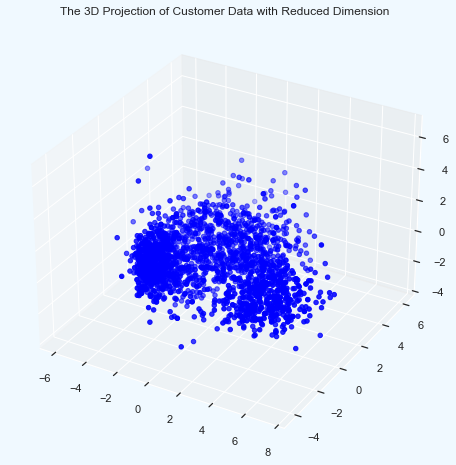

In [36]:
# Get the 3D projection of Data in the reduced dimensions
x = pca_dataset["col1"]
y = pca_dataset["col2"]
z = pca_dataset["col3"]

# Plot graph
figure = plt.figure(figsize=(10,8))
new_x = figure.add_subplot(111,projection="3d")
new_x.scatter(x,y,z, c="blue", marker="o")
new_x.set_title("The 3D Projection of Customer Data with Reduced Dimension")
plt.show()

In [37]:
# Clustering

# Clustering will be done via Agglomerative clustering - hierarchical clustering method. It merges the examples until the desired number of clusters is achieved

# Steps:
# 1. Elbow method would be used to determine the number of clusters
# 2. Using Agglomerative Clustering for forming clusters
# 3. Examine the clusters with the help of scatter plot

Finding the number of clusters using Elbow method


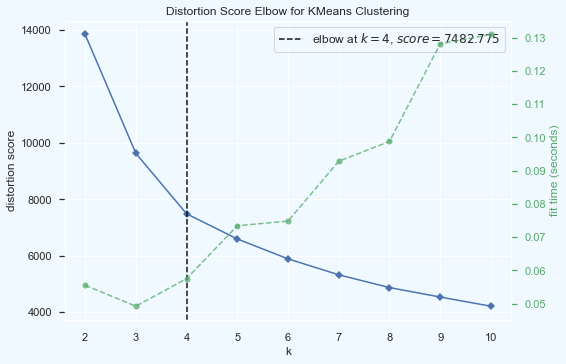

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
# Finding the number of clusters to be formed using Elbow method
print("Finding the number of clusters using Elbow method")
elbow_chart = KElbowVisualizer(KMeans(), k=10)
elbow_chart.fit(pca_dataset)
elbow_chart.show()
# the chart below indicates that 4 is the number of clusters for the customer dataset

In [40]:
# Getting 4 clusters from above, now fitting the agglomerative clustering model to get the clusters
# intialize the model (agglomerative)
agglomerative_clustering = AgglomerativeClustering(n_clusters=4)
# fit the model to predict clusters
clusters_AC = agglomerative_clustering.fit_predict(pca_dataset)
pca_dataset["Clusters"] = clusters_AC
# adding the clusters to original Dataset
customer["Clusters"] = clusters_AC
customer["Clusters"]

0       1
1       3
2       1
3       2
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Name: Clusters, Length: 2212, dtype: int64

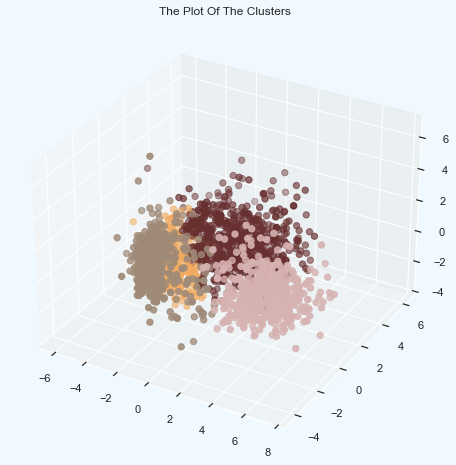

In [42]:
# Plotting the clusters
figure = plt.figure(figsize=(10,8))
new_x = plt.subplot(111, projection='3d', label="bla")
new_x.scatter(x, y, z, s=40, c=pca_dataset["Clusters"], marker='o', cmap = cmap )
new_x.set_title("The Plot Of The Clusters")
plt.show()

In [44]:
# Getting 4 clusters from above, now fitting the agglomerative clustering model to get the clusters
# intialize the model (agglomerative)
kmeans_clustering = KMeans(n_clusters=4)
# fit the model to predict clusters
clusters_KM = kmeans_clustering.fit_predict(pca_dataset)
pca_dataset["Clusters_KMeans"] = clusters_KM
# adding the clusters to original Dataset
customer["Clusters_KMeans"] = clusters_AC
customer["Clusters_KMeans"]

0       1
1       3
2       1
3       2
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Name: Clusters_KMeans, Length: 2212, dtype: int64

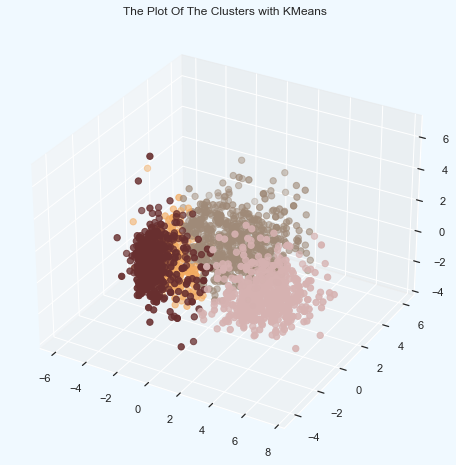

In [45]:
# Plotting the clusters
figure = plt.figure(figsize=(10,8))
new_x = plt.subplot(111, projection='3d', label="bla")
new_x.scatter(x, y, z, s=40, c=pca_dataset["Clusters_KMeans"], marker='o', cmap = cmap )
new_x.set_title("The Plot Of The Clusters with KMeans")
plt.show()

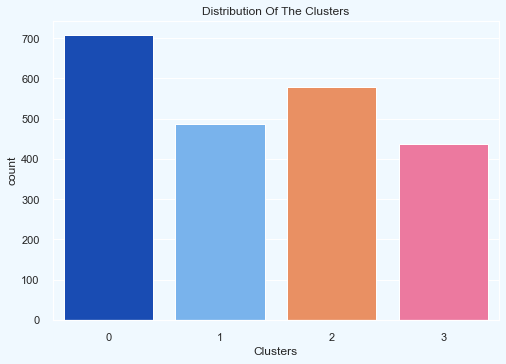

In [46]:
# Evaluating Models
# unsupervised clustering - no tagged feature to evaluate or score our model
# first step - Group distribution of clustering

palette = ["#0044cc", "#66b3ff", "#ff884d", "#ff6699"]
plot_clusters = sns.countplot(x=customer["Clusters"], palette= palette)
plot_clusters.set_title("Distribution Of The Clusters")
plt.show()
# cluster looks fairly distributed

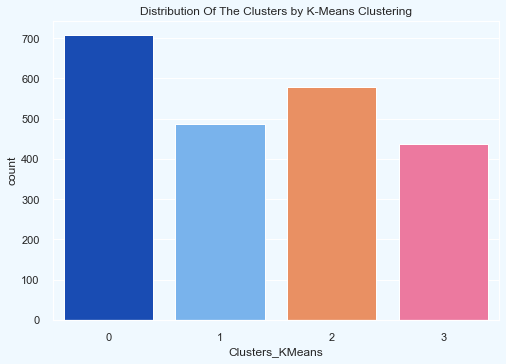

In [47]:
palette = ["#0044cc", "#66b3ff", "#ff884d", "#ff6699"]
plot_clusters = sns.countplot(x=customer["Clusters_KMeans"], palette= palette)
plot_clusters.set_title("Distribution Of The Clusters by K-Means Clustering")
plt.show()
# cluster looks fairly distributed

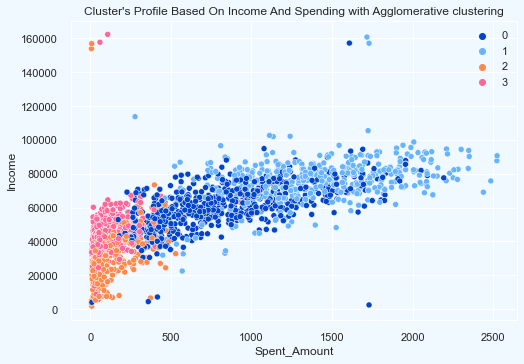

In [51]:
plot_clusters_income = sns.scatterplot(data = customer,x=customer["Spent_Amount"], y=customer["Income"],hue=customer["Clusters"], palette= palette)
plot_clusters_income.set_title("Cluster's Profile Based On Income And Spending with Agglomerative clustering")
plot_clusters_income.legend()
plt.show()

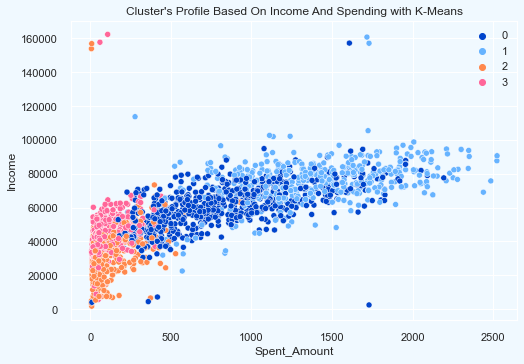

In [49]:
plot_clusters_income = sns.scatterplot(data = customer,x=customer["Spent_Amount"], y=customer["Income"],hue=customer["Clusters_KMeans"], palette= palette)
plot_clusters_income.set_title("Cluster's Profile Based On Income And Spending with K-Means")
plot_clusters_income.legend()
plt.show()

In [42]:
# Income vs spending cluster patterns from above 
# group 0 = Average Income, High Spending
# group 1 = High Income, High Spending
# group 2 = Low Income, Low Spending
# group 3 = High Income, Low Spending

/Users/snehipachchigar/miniconda3/envs/cust-analysis/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 33.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/snehipachchigar/miniconda3/envs/cust-analysis/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/snehipachchigar/miniconda3/envs/cust-analysis/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/snehipachchigar/miniconda3/envs/cust-analysis/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or us

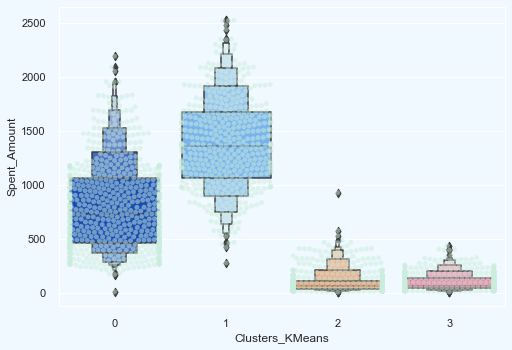

In [52]:
# Detailed distribution of clusters with K-Means per products in the dataset
# Products considered = Gold, Sweets, Fish, Meat, Fruits, Wines
plt.figure()
plot_clusters_per_product=sns.swarmplot(x=customer["Clusters_KMeans"], y=customer["Spent_Amount"], color= "#CBEDDD", alpha=0.5 )
plot_clusters_per_product=sns.boxenplot(x=customer["Clusters_KMeans"], y=customer["Spent_Amount"], palette=palette)
plt.show()
# graph below shows cluster 1 = biggest set of customers, followed by cluster 0

/Users/snehipachchigar/miniconda3/envs/cust-analysis/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 33.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/snehipachchigar/miniconda3/envs/cust-analysis/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/snehipachchigar/miniconda3/envs/cust-analysis/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/snehipachchigar/miniconda3/envs/cust-analysis/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or us

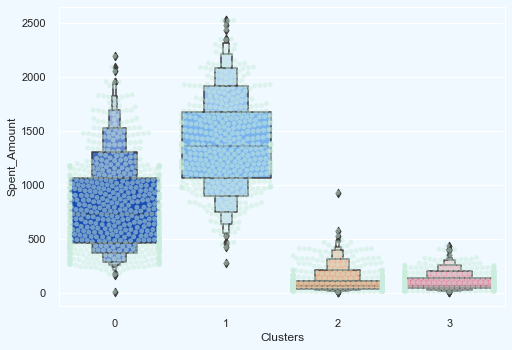

In [53]:
# Detailed distribution of clusters per products in the dataset
# Products considered = Gold, Sweets, Fish, Meat, Fruits, Wines
plt.figure()
plot_clusters_per_product=sns.swarmplot(x=customer["Clusters"], y=customer["Spent_Amount"], color= "#CBEDDD", alpha=0.5 )
plot_clusters_per_product=sns.boxenplot(x=customer["Clusters"], y=customer["Spent_Amount"], palette=palette)
plt.show()
# graph below shows cluster 1 = biggest set of customers, followed by cluster 0

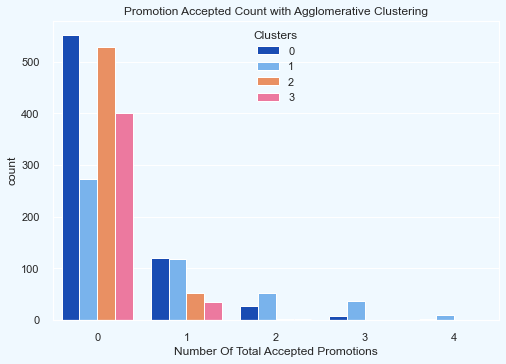

In [54]:
# effects of campaigns in the past
# Feature engineering to get a sum of accepted promotions
customer["promotions_accepted"] = customer["AcceptedCmp1"]+ customer["AcceptedCmp2"]+ customer["AcceptedCmp3"]+ customer["AcceptedCmp4"]+ customer["AcceptedCmp5"]
# Plotting the total caimpaign count accepted
plt.figure()
pl = sns.countplot(x=customer["promotions_accepted"],hue=customer["Clusters"], palette= palette)
pl.set_title("Promotion Accepted Count with Agglomerative Clustering")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

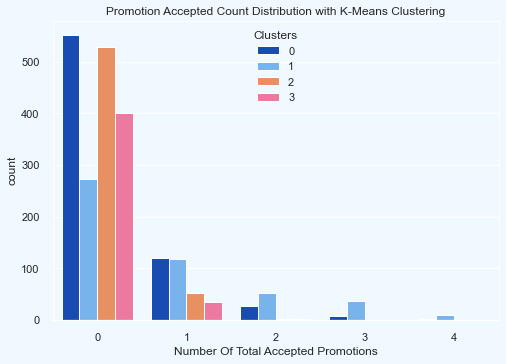

In [55]:
# effects of campaigns in the past
# Feature engineering to get a sum of accepted promotions
customer["promotions_accepted"] = customer["AcceptedCmp1"]+ customer["AcceptedCmp2"]+ customer["AcceptedCmp3"]+ customer["AcceptedCmp4"]+ customer["AcceptedCmp5"]
# Plotting the total caimpaign count accepted
plt.figure()
pl = sns.countplot(x=customer["promotions_accepted"],hue=customer["Clusters"], palette= palette)
pl.set_title("Promotion Accepted Count Distribution with K-Means Clustering")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [47]:
# Above shows that there is no overwhelming response to the campaigns
# Very few participants overall
# no one takes part in 5 of them
# Better targeted and well planned campaigns are required?

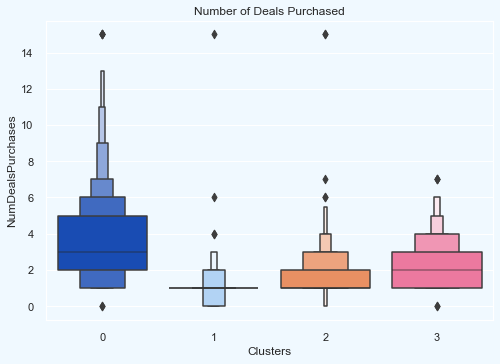

In [49]:
# Plotting the deals count purchased
plt.figure()
deals_purchased_plot =sns.boxenplot(y=customer["NumDealsPurchases"],x=customer["Clusters"], palette= palette)
deals_purchased_plot.set_title("Number of Deals Purchased")
plt.show()

<Figure size 576x396 with 0 Axes>

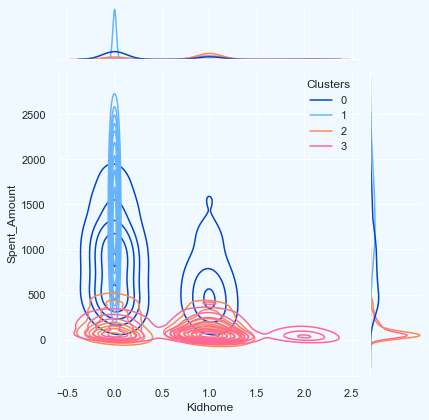

/Users/snehipachchigar/miniconda3/envs/cust-analysis/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

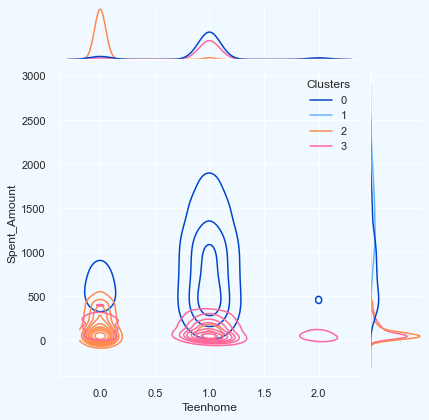

<Figure size 576x396 with 0 Axes>

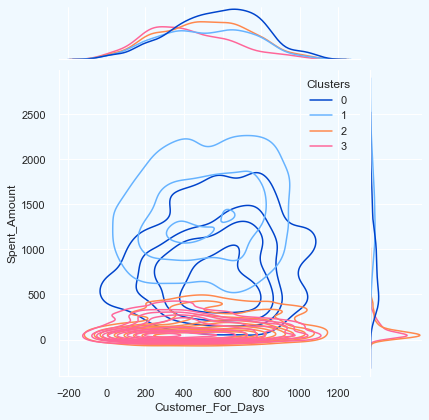

<Figure size 576x396 with 0 Axes>

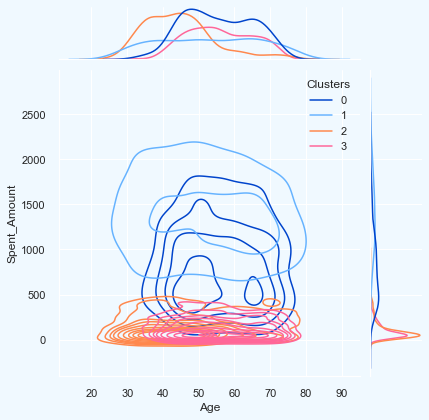

<Figure size 576x396 with 0 Axes>

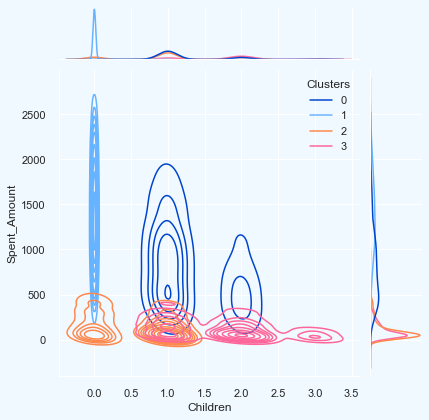

<Figure size 576x396 with 0 Axes>

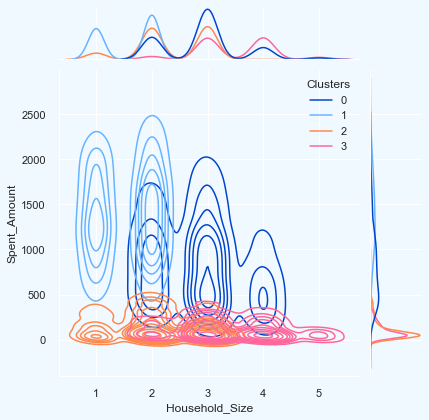

/Users/snehipachchigar/miniconda3/envs/cust-analysis/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

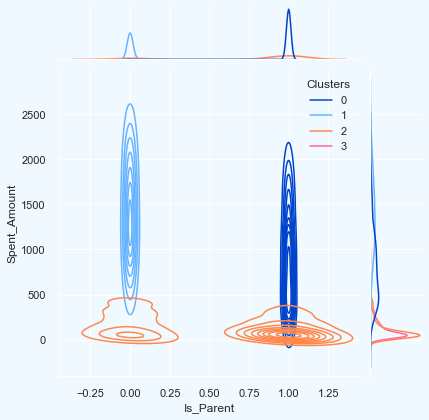

<Figure size 576x396 with 0 Axes>

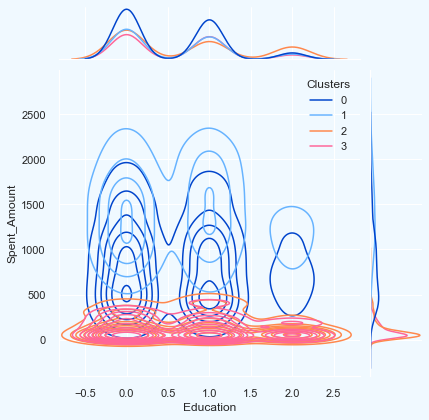

<Figure size 576x396 with 0 Axes>

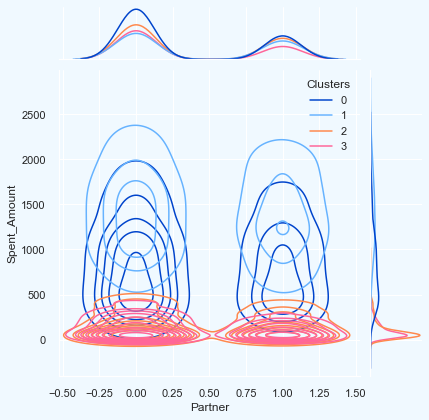

In [51]:
# Profiling
Personal = [ "Kidhome","Teenhome","Customer_For_Days", "Age", "Children", "Household_Size", "Is_Parent", "Education","Partner"]
for i in Personal:
    plt.figure()
    sns.jointplot(x=customer[i], y=customer["Spent_Amount"], hue =customer["Clusters"], kind="kde", palette=palette)
    plt.show()

<Figure size 576x396 with 0 Axes>

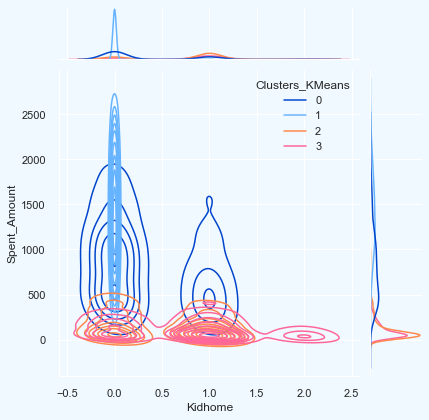

/Users/snehipachchigar/miniconda3/envs/cust-analysis/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

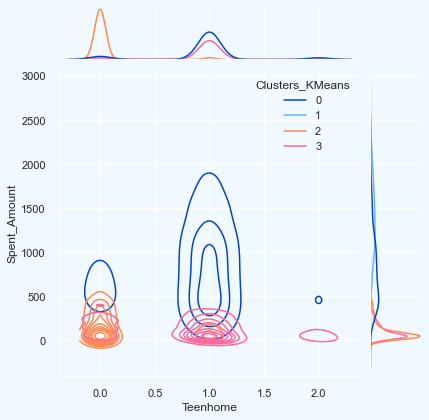

<Figure size 576x396 with 0 Axes>

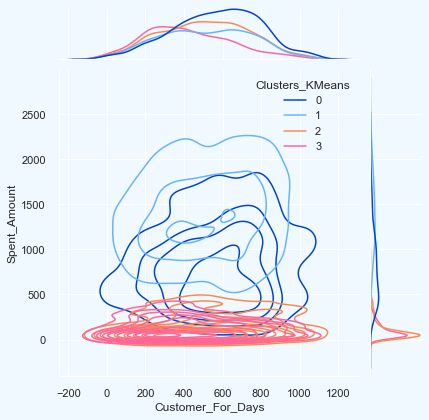

<Figure size 576x396 with 0 Axes>

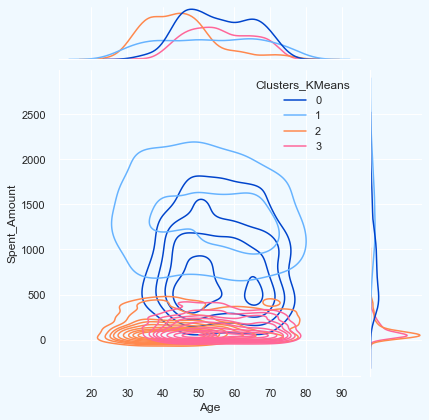

<Figure size 576x396 with 0 Axes>

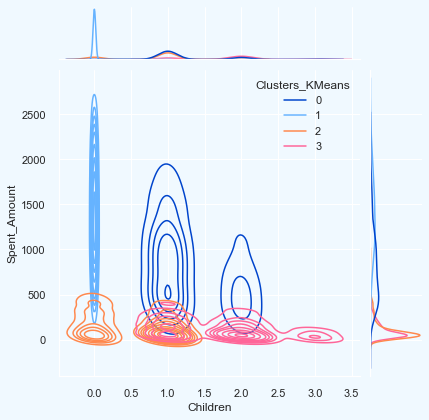

<Figure size 576x396 with 0 Axes>

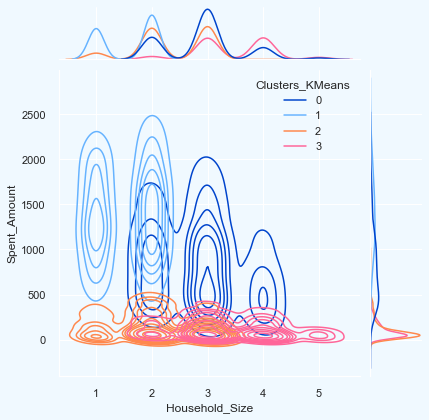

/Users/snehipachchigar/miniconda3/envs/cust-analysis/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

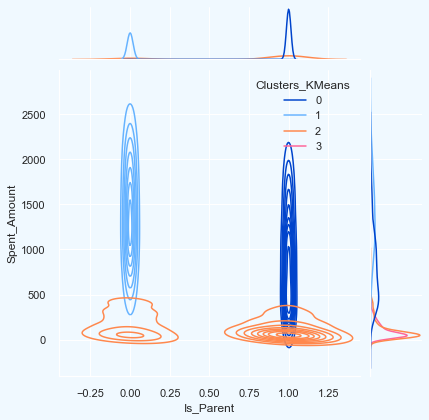

<Figure size 576x396 with 0 Axes>

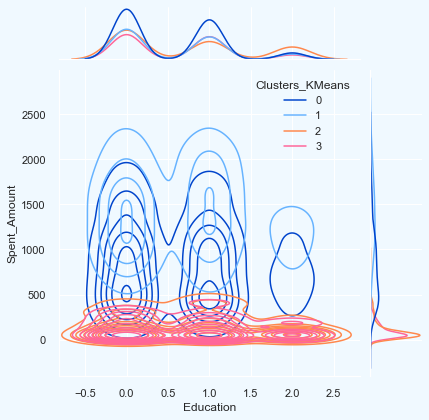

<Figure size 576x396 with 0 Axes>

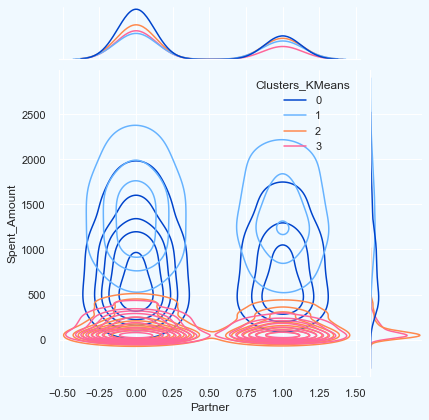

In [50]:
# Profiling with K means
Personal = [ "Kidhome","Teenhome","Customer_For_Days", "Age", "Children", "Household_Size", "Is_Parent", "Education","Partner"]
for i in Personal:
    plt.figure()
    sns.jointplot(x=customer[i], y=customer["Spent_Amount"], hue =customer["Clusters_KMeans"], kind="kde", palette=palette)
    plt.show()